# Imports:

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist, euclidean


from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from SampleLists.SampleFileFunctions import *
from PhenotypicData.PhenotypeGenerationFunctions import *
from CardioProject.CardioFunctions import *
from PredictionPipeline.PredictionFunctions import *
from TCR_feature_generation.SubsamplingFunctions import *

import os
from Utils import cacheOnDisk
from queue.qp import qp,fakeqp
from addloglevels import sethandlers

#ML imports:
from xgboost import XGBClassifier
import lightgbm as lgb
from collections import OrderedDict
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
import shap
from sklearn import metrics, preprocessing
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.naive_bayes import GaussianNB

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126


done1
stop
stop
done1
stop
done
done
done
done
stop
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


end of function!!!


# understand shap_values data

In [ ]:
f1='%s/TCR_real_data/metabolomics/predictions_NoamMod/top20_bySeqs_nrandom20/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

In [ ]:
for k,v in shap_values.items():
    print k
    print '-------'
    print v.head()

# try to run new module:

In [ ]:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/metabolomics/acs_top20_BD_PNP530.dat'
acs_top20_BD_PNP530=pd.read_pickle(f2)
acs_top20_BD_PNP530.head()

In [ ]:
f3='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/metabolomics/acs_top20_BD_PNP530_only2.dat'
only2=acs_top20_BD_PNP530.iloc[:,:2]
only2.to_pickle(f3)

## try inserting external model parameters+save selected parameters:

In [12]:
#ran by the terminal:


!python /home/sbenari/workspace/Microbiome/ShaniBA/PredictionPipeline/PredictionModuleShani.py /net/mraid08/export/\
genie/Lab/Personal/ShaniBAF/TCR_real_data/predictions/Trials/documentingParams_10/ -path_to_X\
 /net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__withRels_AgeGenderGFRCorr.dat\
 -path_to_Y /net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/metabolomics/acs_top20_BD_PNP530_only2.dat\
 -n_random 10 -parameter_search_type randomSearch -predictor_params '{"learning_rate":[0.1,0.01],"N_ESTIMATORS": [200,400,600,800,1000,1200],"MAX_DEPTH":[-1, 2, 3, 4, 5, 10],"FEATURE_FRACTION":[0.4,0.6,0.8,1],\
"BAGGING_FRACTION":[0.6,0.8,1],"BAGGING_FREQ":[0, 1, 2, 3, 5, 8, 10],"NUM_LEAVES": [2,4,6,8,10,12,14], "METRIC": ["l2"],"N_THREADS":[1], "VERBOSE":[-1],"EARLY_STOPPING_ROUNDS":["None"],\
"SILENT": ["True"]}'
#     , ,,}'

UsageError: Cell magic `%%async_run` not found.


## try grid search:

In [ ]:
#ran by the terminal:

!python -bg /home/sbenari/workspace/Microbiome/ShaniBA/PredictionPipeline/PredictionModuleShani.py /net/mraid08/export/\
genie/Lab/Personal/ShaniBAF/TCR_real_data/predictions/Trials/documentingParams_10/ -path_to_X\
 /net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/allTCRfeatures_percShared10__withRels_AgeGenderGFRCorr.dat\
 -path_to_Y /net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/metabolomics/acs_top20_BD_PNP530_only2.dat\
 -n_random 10 -parameter_search_type gridSearch -predictor_params '{"learning_rate":[0.1,0.01],"N_ESTIMATORS": [100,500,1000]}'


## try XGB:

### random search, 20:

ran using the terminal, n_iter=2, random search trying n_estimators, learning rate and max_depth

In [58]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_randomSearch_20/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

isCardio
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0          0.010          9           600         10        0.7
2       0          0.100          3           600         10        0.7
3       1          0.010          7           600          0        0.5
4       0          0.005          9          1000          1        0.5
5       0          0.100          9          1400          5        0.5
6       0          0.005          9           600          1        0.5
7       0          0.005          9          1400          5        0.5
8       0          0.050          5           600          5        0.5
9       0          0.100          5           200         10        0.5
10      0          0.050          9          1400         10        0.7


conclusion: using n_iter=2 can't enable selecting the right parameters... too noisy

In [59]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_randomSearch_20/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,Size,Coefficient_of_determination,pearson_r,pearson_p,spearman_r,spearman_p,prevalence,AUC,Precision_Recall
isCardio,656,NaN,NaN,NaN,NaN,NaN,0.192073,0.923585,0.765374


In [60]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_randomSearch_20/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

for k,v in shap_values.items():
    print k
    print '------------------------'
    print v.abs().sum().sort_values(ascending=False).head(20)
    impFeatures=v.abs().sum().sort_values(ascending=False).head(20)

isCardio
------------------------
CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes    379.539451
SIV_rel_cum_freq(perc)_AgeCorrRes                          205.832575
V05-02_T_GenderCorrRes                                     158.842834
totalAnnotatefreqs_GenderCorrRes                           125.284040
Lungcancer_rel_cum_freq(perc)_GenderCorrRes                 66.635342
frequencyCount (%)_max_0_AgeCorrRes_GenderCorrRes           51.180762
frequencyCount (%)_std_0_AgeCorrRes_GenderCorrRes           49.268223
V05-02_1_GenderCorrRes                                      48.523423
Lupus_rel_cum_freq(perc)_GenderCorrRes                      36.247186
vDeletion_max_T_GFRCorrRes                                  29.744334
vDeletion_mean_0                                            27.614106
d3Deletion_mean_0_AgeCorrRes_GFRCorrRes                     26.844420
V05-06_1                                                    25.774887
V09-01_T_GenderCorrRes                                  

### random search, 20 (repeat2 - improved):

ran using the terminal, n_iter=2, random search trying n_estimators, learning rate and max_depth

In [65]:
f1='%s/TCR_real_data/predictions2/isCardio/XGB_randomSearch_20_2/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

isCardio
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0           0.01          9          1000         10        0.7
2       1           0.05          9          1000         10        0.7
3       0           0.01          7          1000         10        0.5
4       0           0.10          9          1400          5        0.5
5       0           0.10          7          1400         10        0.5
6       0           0.05          5          1400         10        0.5
7       1           0.01          7           600          0        0.7
8       1           0.10          3          1400         10        0.5
9       1           0.10          5           600         10        0.5
10      0           0.01          7          1400         10        0.5


In [66]:
f1='%s/TCR_real_data/predictions2/isCardio/XGB_randomSearch_20_2/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,Size,Coefficient_of_determination,pearson_r,pearson_p,spearman_r,spearman_p,prevalence,AUC,Precision_Recall
isCardio,656,NaN,NaN,NaN,NaN,NaN,0.192073,0.92354,0.769265


In [67]:
f1='%s/TCR_real_data/predictions2/isCardio/XGB_randomSearch_20_2/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

for k,v in shap_values.items():
    print k
    print '------------------------'
    print v.abs().sum().sort_values(ascending=False).head(20)
    impFeatures=v.abs().sum().sort_values(ascending=False).head(20)

isCardio
------------------------
CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes    370.880285
SIV_rel_cum_freq(perc)_AgeCorrRes                          206.679630
V05-02_T_GenderCorrRes                                     153.940628
totalAnnotatefreqs_GenderCorrRes                           119.770173
Lungcancer_rel_cum_freq(perc)_GenderCorrRes                 66.064703
V05-02_1_GenderCorrRes                                      56.299385
frequencyCount (%)_std_0_AgeCorrRes_GenderCorrRes           46.809394
frequencyCount (%)_max_0_AgeCorrRes_GenderCorrRes           43.470818
Lupus_rel_cum_freq(perc)_GenderCorrRes                      32.817142
d3Deletion_mean_0_AgeCorrRes_GFRCorrRes                     27.479010
vDeletion_max_T_GFRCorrRes                                  23.690084
jDeletion_std_T_AgeCorrRes                                  22.657483
vDeletion_mean_0                                            20.959956
V20_J01_0_GFRCorrRes                                    

### random search, 200:

ran using the terminal, n_iter=2, random search trying n_estimators, learning rate and max_depth

In [61]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_randomSearch_200/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

isCardio
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0          0.010          7          1400         10        0.5
2       0          0.005          9          1400          0        0.5
3       0          0.005          3          1400          0        0.5
4       1          0.010          7           600          0        0.5
5       1          0.005          9          1000          5        0.5
6       0          0.100          7           600         10        0.5
7       5          0.050          3          1000          0        0.7
8       0          0.100          3           200         10        0.7
9       0          0.100          9           600          5        0.5
10      0          0.005          7          1400          5        0.5


In [62]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_randomSearch_200/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,Size,Coefficient_of_determination,pearson_r,pearson_p,spearman_r,spearman_p,prevalence,AUC,Precision_Recall
isCardio,656,NaN,NaN,NaN,NaN,NaN,0.192073,0.918778,0.767036


In [63]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_randomSearch_200/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

for k,v in shap_values.items():
    print k
    print '------------------------'
    print v.abs().sum().sort_values(ascending=False).head(20)
    impFeatures=v.abs().sum().sort_values(ascending=False).head(20)

isCardio
------------------------
CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes    381.556163
SIV_rel_cum_freq(perc)_AgeCorrRes                          220.275312
V05-02_T_GenderCorrRes                                     158.063193
totalAnnotatefreqs_GenderCorrRes                           126.622939
Lungcancer_rel_cum_freq(perc)_GenderCorrRes                 73.396080
V05-02_1_GenderCorrRes                                      57.514371
frequencyCount (%)_max_0_AgeCorrRes_GenderCorrRes           54.540765
frequencyCount (%)_std_0_AgeCorrRes_GenderCorrRes           51.155534
Lupus_rel_cum_freq(perc)_GenderCorrRes                      34.610142
V05-06_1                                                    32.600228
d3Deletion_mean_0_AgeCorrRes_GFRCorrRes                     32.262216
vDeletion_max_T_GFRCorrRes                                  28.612153
vDeletion_mean_0                                            26.144430
V20_J01_0_GFRCorrRes                                    

### grid search, small:

ran using the terminal, n_iter=2, random search trying n_estimators, learning rate and max_depth

In [41]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_gridSearch1/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

isCardio
----
    learning_rate  n_estimators
1            0.01          1000
2            0.01           500
3            0.10           100
4            0.05          1000
5            0.10          1000
6            0.10           100
7            0.05           100
8            0.10           100
9            0.01           500
10           0.10          1000


conclusion: using n_iter=2 can't enable selecting the right parameters... too noisy

In [42]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_gridSearch1/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,Size,Coefficient_of_determination,pearson_r,pearson_p,spearman_r,spearman_p,prevalence,AUC,Precision_Recall
isCardio,656,NaN,NaN,NaN,NaN,NaN,0.192073,0.896092,0.763175


In [44]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_gridSearch1/predictions_df.pkl' %MyPath
predictions_df=pd.read_pickle(f1)
predictions_df.head()

,isCardio
BD1,0.00158422
BD2,0.000394043
BD3,0.0022989
BD4,0.000369778
BD5,0.00468301


In [49]:
f1='%s/TCR_real_data/predictions/isCardio/XGB_gridSearch1/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

for k,v in shap_values.items():
    print k
    print '------------------------'
    print v.abs().sum().sort_values(ascending=False).head(20)
    impFeatures=v.abs().sum().sort_values(ascending=False).head(20)


isCardio
------------------------
CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes    628.124110
SIV_rel_cum_freq(perc)_AgeCorrRes                          352.529387
V05-02_T_GenderCorrRes                                     308.624805
Lungcancer_rel_cum_freq(perc)_GenderCorrRes                180.007359
totalAnnotatefreqs_GenderCorrRes                           171.924618
Lupus_rel_cum_freq(perc)_GenderCorrRes                      77.768225
V05-06_1                                                    73.580574
d3Deletion_std_1_AgeCorrRes                                 71.953493
frequencyCount (%)_max_0_AgeCorrRes_GenderCorrRes           69.718308
frequencyCount (%)_std_0_AgeCorrRes_GenderCorrRes           69.222647
V20-01_1_GenderCorrRes                                      68.740819
jDeletion_std_T_AgeCorrRes                                  68.531856
d3Deletion_mean_0_AgeCorrRes_GFRCorrRes                     65.269191
NT count_0_AgeCorrRes_GenderCorrRes_GFRCorrRes          

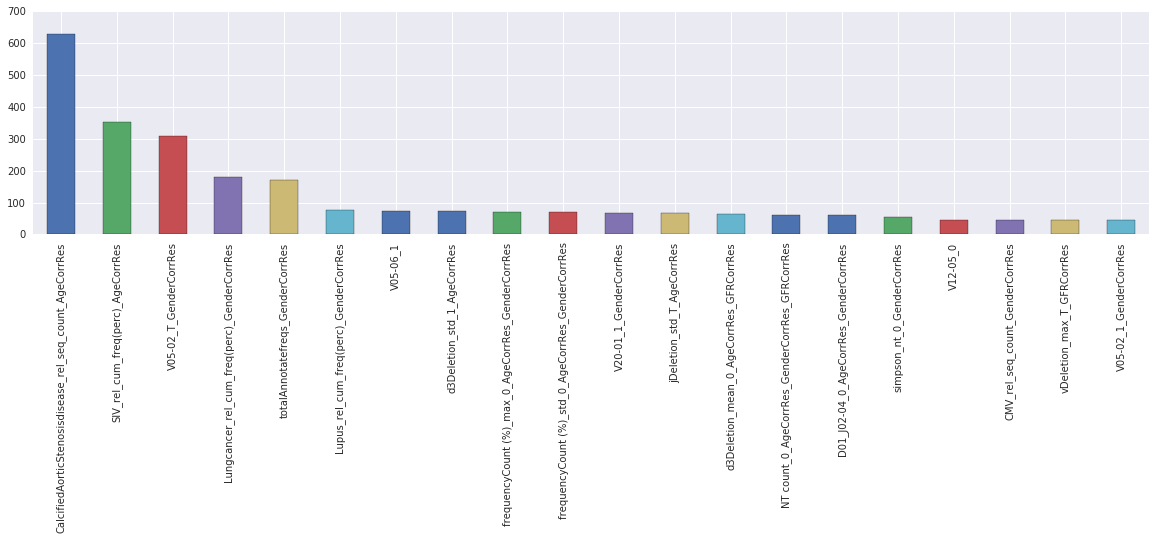

In [54]:
impFeatures.plot(kind='bar',figsize=(20,4))
plt.show()

### random search, 20, cardio phenotypes (table1)

ran using the terminal, n_iter=2, random search trying n_estimators, learning rate and max_depth

In [70]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_25_cardioSamplesTable1/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

LVEFmapped_2
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0          0.100          3           200         10        0.7
2       1          0.100          3          1400          0        0.7
3      10          0.050          7           200          1        0.7
4      10          0.005          7          1000         10        0.5
5       5          0.005          7          1400         10        0.5
6      10          0.050          3           200          0        0.5
7       1          0.050          3           600          1        0.5
8      10          0.010          1          1400          1        0.7
9       5          0.050          1           200          1        0.7
10     10          0.050          5          1400          1        0.5
LVEFmapped
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0          0.100          3          1400         10        0.7
2       5          0.100      

In [71]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_25_cardioSamplesTable1/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,AUC,Coefficient_of_determination,Precision_Recall,Size,pearson_p,pearson_r,prevalence,spearman_p,spearman_r
Glucose Disorder_No,0.490657,NaN,0.494706,126,NaN,NaN,0.523810,NaN,NaN
PCI_binary,0.469597,NaN,0.250462,123,NaN,NaN,0.276423,NaN,NaN
Admission Systolic BP,NaN,-0.137886,NaN,125,0.858286,0.0161316,NaN,0.938164,0.00700909
Admission Diagnosis,0.557032,NaN,0.668675,106,NaN,NaN,0.594340,NaN,NaN
Previous PCI,NaN,-0.000520149,NaN,124,0.857239,0.0163187,NaN,0.743453,0.0296851
Religion,0.458061,NaN,0.202130,125,NaN,NaN,0.136000,NaN,NaN
GRACE Score,NaN,-0.0644786,NaN,125,0.475875,0.0643487,NaN,0.518755,0.0582505
LVEFmapped,0.533997,NaN,0.105439,125,NaN,NaN,0.104000,NaN,NaN
PreviousPCImapped_2+,0.421021,NaN,0.095236,126,NaN,NaN,0.119048,NaN,NaN
Hypertension,0.591948,NaN,0.610837,125,NaN,NaN,0.560000,NaN,NaN


In [67]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_25_cardioSamplesTable1/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

for k,v in shap_values.items():
    print k
    print '------------------------'
    print v.abs().sum().sort_values(ascending=False).head(20)
    impFeatures=v.abs().sum().sort_values(ascending=False).head(20)

isCardio
------------------------
CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes    370.880285
SIV_rel_cum_freq(perc)_AgeCorrRes                          206.679630
V05-02_T_GenderCorrRes                                     153.940628
totalAnnotatefreqs_GenderCorrRes                           119.770173
Lungcancer_rel_cum_freq(perc)_GenderCorrRes                 66.064703
V05-02_1_GenderCorrRes                                      56.299385
frequencyCount (%)_std_0_AgeCorrRes_GenderCorrRes           46.809394
frequencyCount (%)_max_0_AgeCorrRes_GenderCorrRes           43.470818
Lupus_rel_cum_freq(perc)_GenderCorrRes                      32.817142
d3Deletion_mean_0_AgeCorrRes_GFRCorrRes                     27.479010
vDeletion_max_T_GFRCorrRes                                  23.690084
jDeletion_std_T_AgeCorrRes                                  22.657483
vDeletion_mean_0                                            20.959956
V20_J01_0_GFRCorrRes                                    

## try linear models:

ran using the terminal, n_iter=2, random search trying n_estimators, learning rate and max_depth

In [39]:
f1='%s/TCR_real_data/predictions/isCardio/lin_gridSearch/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

isCardio
----
       C penalty
1   0.01      l2
2   0.01      l2
3   0.01      l2
4   0.01      l2
5   0.01      l2
6   0.01      l2
7   0.01      l2
8   0.01      l2
9   0.01      l2
10  0.01      l2


In [40]:
f1='%s/TCR_real_data/predictions/isCardio/lin_gridSearch/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,Size,Coefficient_of_determination,pearson_r,pearson_p,spearman_r,spearman_p,prevalence,AUC,Precision_Recall
isCardio,656,NaN,NaN,NaN,NaN,NaN,0.192073,0.833004,0.601266


In [33]:
targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
f1='%s/TCR_real_data/predictions/TargetDFs/isCardio.dat' %MyPath
targetDF.to_pickle(f1)


In [34]:
d={'a':[1,2,3],'b':[2,3,4]}
str(d)

"{'a': [1, 2, 3], 'b': [2, 3, 4]}"

# predict cardio-related phenotypes:

### random search, 20, cardio phenotypes (table1)

ran using the terminal, n_iter=2, random search trying n_estimators, learning rate and max_depth

In [70]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_25_cardioSamplesTable1/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

LVEFmapped_2
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0          0.100          3           200         10        0.7
2       1          0.100          3          1400          0        0.7
3      10          0.050          7           200          1        0.7
4      10          0.005          7          1000         10        0.5
5       5          0.005          7          1400         10        0.5
6      10          0.050          3           200          0        0.5
7       1          0.050          3           600          1        0.5
8      10          0.010          1          1400          1        0.7
9       5          0.050          1           200          1        0.7
10     10          0.050          5          1400          1        0.5
LVEFmapped
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0          0.100          3          1400         10        0.7
2       5          0.100      

In [71]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_25_cardioSamplesTable1/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,AUC,Coefficient_of_determination,Precision_Recall,Size,pearson_p,pearson_r,prevalence,spearman_p,spearman_r
Glucose Disorder_No,0.490657,NaN,0.494706,126,NaN,NaN,0.523810,NaN,NaN
PCI_binary,0.469597,NaN,0.250462,123,NaN,NaN,0.276423,NaN,NaN
Admission Systolic BP,NaN,-0.137886,NaN,125,0.858286,0.0161316,NaN,0.938164,0.00700909
Admission Diagnosis,0.557032,NaN,0.668675,106,NaN,NaN,0.594340,NaN,NaN
Previous PCI,NaN,-0.000520149,NaN,124,0.857239,0.0163187,NaN,0.743453,0.0296851
Religion,0.458061,NaN,0.202130,125,NaN,NaN,0.136000,NaN,NaN
GRACE Score,NaN,-0.0644786,NaN,125,0.475875,0.0643487,NaN,0.518755,0.0582505
LVEFmapped,0.533997,NaN,0.105439,125,NaN,NaN,0.104000,NaN,NaN
PreviousPCImapped_2+,0.421021,NaN,0.095236,126,NaN,NaN,0.119048,NaN,NaN
Hypertension,0.591948,NaN,0.610837,125,NaN,NaN,0.560000,NaN,NaN


In [67]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_25_cardioSamplesTable1/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

for k,v in shap_values.items():
    print k
    print '------------------------'
    print v.abs().sum().sort_values(ascending=False).head(20)
    impFeatures=v.abs().sum().sort_values(ascending=False).head(20)

isCardio
------------------------
CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes    370.880285
SIV_rel_cum_freq(perc)_AgeCorrRes                          206.679630
V05-02_T_GenderCorrRes                                     153.940628
totalAnnotatefreqs_GenderCorrRes                           119.770173
Lungcancer_rel_cum_freq(perc)_GenderCorrRes                 66.064703
V05-02_1_GenderCorrRes                                      56.299385
frequencyCount (%)_std_0_AgeCorrRes_GenderCorrRes           46.809394
frequencyCount (%)_max_0_AgeCorrRes_GenderCorrRes           43.470818
Lupus_rel_cum_freq(perc)_GenderCorrRes                      32.817142
d3Deletion_mean_0_AgeCorrRes_GFRCorrRes                     27.479010
vDeletion_max_T_GFRCorrRes                                  23.690084
jDeletion_std_T_AgeCorrRes                                  22.657483
vDeletion_mean_0                                            20.959956
V20_J01_0_GFRCorrRes                                    

### random search, 200, cardio phenotypes (table1)

In [75]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_200_cardioSamplesTable1/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

Microvascular Complications
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0           0.10          9          1400         10        0.7
2       0           0.10          1           600          0        0.5
3       0           0.01          5           600          0        0.5
4       0           0.05          1          1400          1        0.5
5       1           0.01          1           200          0        0.5
6       1           0.10          1           200          0        0.5
7       1           0.10          5          1400          0        0.5
8       5           0.05          7           600          1        0.5
9       1           0.10          1          1000          0        0.5
10      0           0.10          1          1400          0        0.5
Glucose Disorder_No
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0          0.050          9           200         10        0.5
2     

In [76]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_200_cardioSamplesTable1/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,AUC,Coefficient_of_determination,Precision_Recall,Size,pearson_p,pearson_r,prevalence,spearman_p,spearman_r
Maximal Troponin,NaN,-0.0163177,NaN,121,0.0288418,0.198771,NaN,0.135189,0.136594
initial CPK,NaN,-0.0677131,NaN,115,0.70078,0.036217,NaN,0.569577,0.0535763
Admission Diagnosis,0.542267,NaN,0.662923,106,NaN,NaN,0.594340,NaN,NaN
Previous PCI,NaN,-0.0291729,NaN,124,0.225553,-0.109613,NaN,0.287021,-0.0963643
Religion,0.477669,NaN,0.177874,125,NaN,NaN,0.136000,NaN,NaN
LVEFmapped_2,0.402412,NaN,0.073126,126,NaN,NaN,0.095238,NaN,NaN
Maximal CPK,NaN,-0.0528237,NaN,115,0.165346,0.130239,NaN,0.131608,0.14144
Initial Troponin,NaN,-0.0773115,NaN,121,0.585606,-0.0500534,NaN,0.684151,0.0373572
Hypertension,0.542857,NaN,0.582535,125,NaN,NaN,0.560000,NaN,NaN
Previous Angiography,NaN,-0.0370682,NaN,125,0.724854,-0.0317934,NaN,0.734929,0.0305833


In [67]:
f1='%s/TCR_real_data/predictions2/cardioPhenotypes/XGB_randomSearch_25_cardioSamplesTable1/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

for k,v in shap_values.items():
    print k
    print '------------------------'
    print v.abs().sum().sort_values(ascending=False).head(20)
    impFeatures=v.abs().sum().sort_values(ascending=False).head(20)

isCardio
------------------------
CalcifiedAorticStenosisdisease_rel_seq_count_AgeCorrRes    370.880285
SIV_rel_cum_freq(perc)_AgeCorrRes                          206.679630
V05-02_T_GenderCorrRes                                     153.940628
totalAnnotatefreqs_GenderCorrRes                           119.770173
Lungcancer_rel_cum_freq(perc)_GenderCorrRes                 66.064703
V05-02_1_GenderCorrRes                                      56.299385
frequencyCount (%)_std_0_AgeCorrRes_GenderCorrRes           46.809394
frequencyCount (%)_max_0_AgeCorrRes_GenderCorrRes           43.470818
Lupus_rel_cum_freq(perc)_GenderCorrRes                      32.817142
d3Deletion_mean_0_AgeCorrRes_GFRCorrRes                     27.479010
vDeletion_max_T_GFRCorrRes                                  23.690084
jDeletion_std_T_AgeCorrRes                                  22.657483
vDeletion_mean_0                                            20.959956
V20_J01_0_GFRCorrRes                                    

# predict major phenotypes (age, gender etc.)

## baseline - predict using WBC+nTemplates:

In [72]:
f1='%s/TCR_real_data/predictions2/PNP530_majorPhenotypes/XGB_randomSearch_25_byWBCnTemplates/selected_model_params.pkl' %MyPath
selected_model_params=pd.read_pickle(f1)

for k,v in selected_model_params.items():
    print k
    print '----'
    print v

Smoking Status_Past
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       1           0.05          1          1000          1        0.7
2       0           0.10          3           200          0        0.5
3       1           0.05          1           600          0        0.5
4       0           0.10          3           200          1        0.5
5       1           0.10          5          1000          1        0.7
6       1           0.10          9           200          0        0.5
7       0           0.05          1          1400          0        0.5
8       5           0.01          1           600         10        0.7
9       0           0.10          5           200          0        0.5
10      1           0.05          3           600          0        0.5
Age
----
    gamma  learning_rate  max_depth  n_estimators  reg_alpha  subsample
1       0          0.010          1           600          5        0.7
2       5          0.005      

In [73]:
f1='%s/TCR_real_data/predictions2/PNP530_majorPhenotypes/XGB_randomSearch_25_byWBCnTemplates/results_df.pkl' %MyPath
results_df=pd.read_pickle(f1)
results_df


,AUC,Coefficient_of_determination,Precision_Recall,Size,pearson_p,pearson_r,prevalence,spearman_p,spearman_r
Smoking Status_Yes,0.467880,NaN,0.090766,949,NaN,NaN,0.099052,NaN,NaN
Age,NaN,-0.0188756,NaN,943,0.36219,0.0297056,NaN,0.323736,0.0321693
BMI,NaN,0.0157421,NaN,887,3.85735e-06,0.154375,NaN,2.15163e-07,0.173049
Smoking Status_Past,0.516702,NaN,0.271667,949,NaN,NaN,0.247629,NaN,NaN
Gender_Male,0.537156,NaN,0.415248,949,NaN,NaN,0.389884,NaN,NaN
Glucose,NaN,0.0103835,NaN,929,7.62344e-05,0.129418,NaN,7.46987e-05,0.129576
Total Cholesterol,NaN,-0.0209705,NaN,932,0.919044,-0.00333373,NaN,0.524923,0.0208512
eGFR by CKD-EPI,NaN,0.0171977,NaN,901,3.58336e-06,0.153683,NaN,2.83742e-06,0.155257
HbA1C,NaN,0.026433,NaN,909,8.07697e-07,0.162765,NaN,6.71769e-07,0.163932


In [74]:
f1='%s/TCR_real_data/predictions2/PNP530_majorPhenotypes/XGB_randomSearch_25_byWBCnTemplates/shap_values.pkl' %MyPath
shap_values=pd.read_pickle(f1)

for k,v in shap_values.items():
    print k
    print '------------------------'
    print v.abs().sum().sort_values(ascending=False).head(20)
    impFeatures=v.abs().sum().sort_values(ascending=False).head(20)

Smoking Status_Past
------------------------
WBC           443.107948
nTemplates    306.470407
dtype: float64
Age
------------------------
nTemplates    1143.543022
WBC            760.484562
dtype: float64
BMI
------------------------
WBC           834.167138
nTemplates    209.235660
dtype: float64
HbA1C
------------------------
WBC           62.407916
nTemplates     5.328004
dtype: float64
Total Cholesterol
------------------------
WBC           3015.652370
nTemplates    1963.257727
dtype: float64
eGFR by CKD-EPI
------------------------
WBC           2845.022934
nTemplates    1006.934956
dtype: float64
Smoking Status_Yes
------------------------
nTemplates    110.137622
WBC            92.607349
dtype: float64
Gender_Male
------------------------
WBC           190.600334
nTemplates     57.854469
dtype: float64
Glucose
------------------------
WBC           1618.851390
nTemplates     270.812767
dtype: float64
